# Analysis of Star Wars Survey
This project will attempt to identify the most popular Star Wars film by analysing the results of a Star Wars survey conducted by FiveThirtyEight. The report will also take a look out how the respondent's age and gender influence their response. 

The data used for this analysis was collected by FiveThirtyEight in 2014 using the online tool SurveyMonkey. The survey received a total of 835 responses and includes information regarding the responsdents gender, age, household income, education and location. It data is publicly available [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). 

Lets start by importing and exploring the data.
# Explore the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
star_wars = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv", encoding="ISO-8859-1")
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Initial observations:
- Column titles apears to slide out of the header into the first row;
- Alot of the columns appear to test how well the respondent knows and likes Star Wars and the Sci-Fi genre in general;
- A few of the columns contain "yes", "no" answers. These will be converted to "True", "False" to make the analysis easier.
# Convert Columns to Boolean

In [3]:
# Remove rows where respondentID is NaN
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

# create dictionary to define mapping from each value in series to a new value:
yes_no = {
    "Yes": True,
    "No": False
}
# Apply mapping to "Have you seen any of the 6 films in the Star Wars franchise?" & 
# "Do you consider yourself to be a fan of the Star Wars film franchise?" columns
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

import numpy as np
# Use mapping to change movie columns to true/false depending on whether seen or not
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)
    
# Update column names
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

# Check result
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Analysis of Rankings Data
Columns 10 to 15 of the dataframe ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Lets calculate the mean of each of these columns to see which film is most favoured among Star Wars fans.

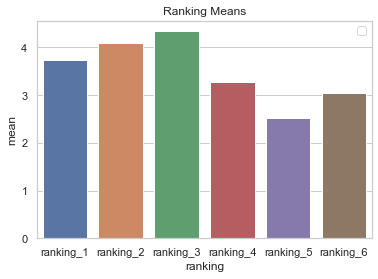

In [14]:
# Convert ranking columns to numeric type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Rename columns
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

# Compute mean of ranking columns
ranking_cols = star_wars[star_wars.columns[9:15]]
mean_ranking = ranking_cols.mean()

# Create DF
mean_ranking = pd.DataFrame(mean_ranking)
mean_ranking.columns = ["mean"]
mean_ranking["ranking"] = mean_ranking.index.values

#Plot
%matplotlib inline
sns.set(style="whitegrid")
ax = sns.barplot(x="ranking", y="mean", data=mean_ranking)
plt.legend('')
plt.title('Ranking Means')
plt.show()

It appears "Star Wars: Episode V The Empire Strikes Back" is the most popular with an average ranking of 2.5. This is followed by "Star Wars: Episode VI Return of the Jedi" with an average ranking of 3. "Star Wars: Episode III Revenge of the Sith" was the least popular film of the franchise with an average ranking of 4.3. 

Scouring online rating sites such as IMDB and Rotten Tomatoes reveals earlier films of the Star Wars franchise (films 4 to 6) tend to receive higher ratings than the newer films (films 1 to 3). This might explain why these films are ranked higher on average in this survey. 
# Calculate Viewings for Each Film
Next the totals of the seen columns will be calculated to see how many viewings each film recieved by the respondents. 

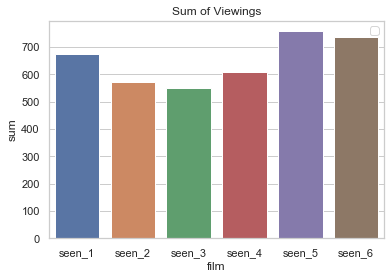

In [4]:
seen_cols = star_wars[star_wars.columns[3:9]]
sum_seen = seen_cols.sum()

# Compute sum of viewings
seen_cols = star_wars[star_wars.columns[3:9]]
sum_seen = seen_cols.sum()

# Create DF
sum_seen = pd.DataFrame(sum_seen)
sum_seen.columns = ["sum"]
sum_seen["film"] = sum_seen.index.values

# Plot
%matplotlib inline
sns.set(style="whitegrid")
ax = sns.barplot(x="film", y="sum", data=sum_seen)
plt.legend('')
plt.title('Sum of Viewings')
plt.show()

Star Wars: Episode V The Empire Strikes Back" received the highest number of viewings at 758. This is followed by "Star Wars: Episode VI Return of the Jedi" with 738 viewings. "Star Wars: Episode III Revenge of the Sith" was viewed the least with a total of 550 viewings. Interestingly, the original Stars War film "Star Wars: Episode IV – A New Hope" received a lower amount of viewings than "Star Wars: Episode I – The Phantom Menace". 

Comparing the sum of viewings with the mean rankings it is clear there is a relationship between the two. The higher the number of viewings the more likely the film is to receive a higher rank. 
# Film Popularity by Gender
Let's split the dataframe in two by gender and see whether the results change.

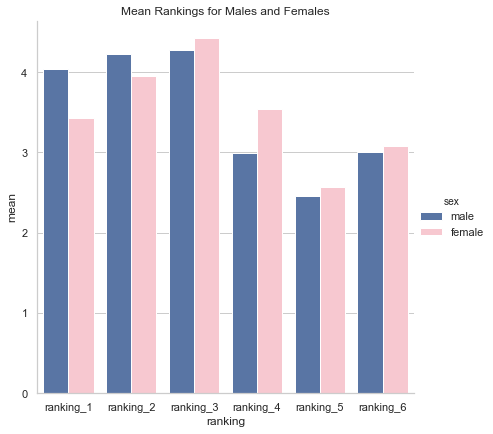

In [17]:
# Split the data
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

# Compute mean of ranking columns for male respondents
ranking_cols_males = males[males.columns[9:15]]
means_males = ranking_cols_males.mean()

# Compute mean of ranking columns for female respondents
ranking_cols_females = females[females.columns[9:15]]
means_females = ranking_cols_females.mean()

# Create new dfs
means_m = pd.DataFrame(means_males)
means_m.columns = ["mean"]
means_m["sex"] = "male"
means_m["ranking"] = means_m.index.values

means_f = pd.DataFrame(means_females)
means_f.columns = ["mean"]
means_f["sex"] = "female"
means_f["ranking"] = means_m.index.values

# concat dfs
means = pd.concat([means_m, means_f])

# Plot grouped barplot
sns.set(style="whitegrid")
g = sns.catplot(x="ranking", y="mean", hue="sex", data=means,
                height=6, kind="bar", palette = ["b","pink"])
plt.title('Mean Rankings for Males and Females')
plt.show()

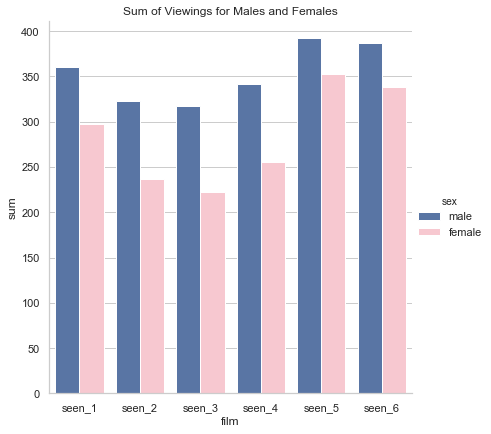

In [18]:
# compute viewings by male respondents
seen_cols_males = males[males.columns[3:9]]
sum_seen_males = seen_cols_males.sum()

# compute viewings by female respondents
seen_cols_females = females[females.columns[3:9]]
sum_seen_females = seen_cols_females.sum()

# Create new dfs
seen_m = pd.DataFrame(sum_seen_males)
seen_m.columns = ["sum"]
seen_m["sex"] = "male"
seen_m["film"] = seen_m.index.values

seen_f = pd.DataFrame(sum_seen_females)
seen_f.columns = ["sum"]
seen_f["sex"] = "female"
seen_f["film"] = seen_f.index.values

# concat dfs
seen = pd.concat([seen_m, seen_f])
means

# Plot
g = sns.catplot(x="film", y="sum", hue="sex", data=seen,
                height=6, kind="bar", palette=["b","pink"])
plt.title('Sum of Viewings for Males and Females')
plt.show()

It seems both sexes agree the earlier films in the franchise are better than the later films. All films received more viewings from males compared to females, with films one to four having the biggest difference in viewings. Some of the earlier films were slightly more popular among females than males despite being viewed less by females.
# Film Popularity by Age Group

Next, lets determine whether or not the respondent's age group influences the results. 

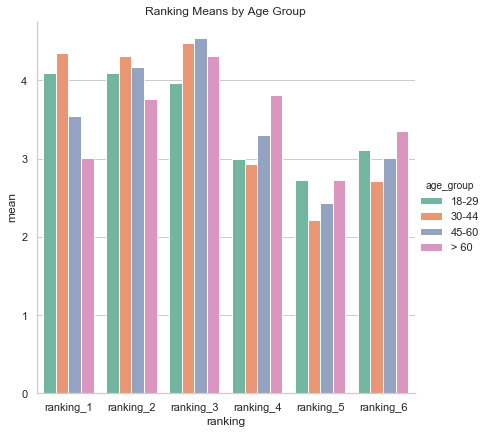

In [70]:
means = {}
for v in star_wars["Age"].unique():
    df = star_wars[star_wars["Age"] == v]
    mean = df[df.columns[9:15]].mean()
    means[v] = mean
    
means = pd.DataFrame(means)
means_age = pd.DataFrame()
for column_name in means.columns:
    series = means[column_name]
    means_age = pd.concat([means_age, series])
    
means_age.columns = ["mean"]
    
means_age["ranking"] = means_age.index.values
means_age["age_group"] = 0
means_age.iloc[:6, 2] = "18-29"
means_age.iloc[6:12, 2] = np.nan
means_age.iloc[12:18, 2] = "30-44"
means_age.iloc[24:, 2] = "45-60"
means_age.iloc[18:24, 2] = "> 60"

means_age = means_age.dropna()
means_age.index = range(24)

# Plot
g = sns.catplot(x="ranking", y="mean", hue="age_group", data=means_age,
                height=6, kind="bar", hue_order=("18-29", "30-44", "45-60", "> 60"), palette="Set2")
plt.title('Ranking Means by Age Group')
plt.show()

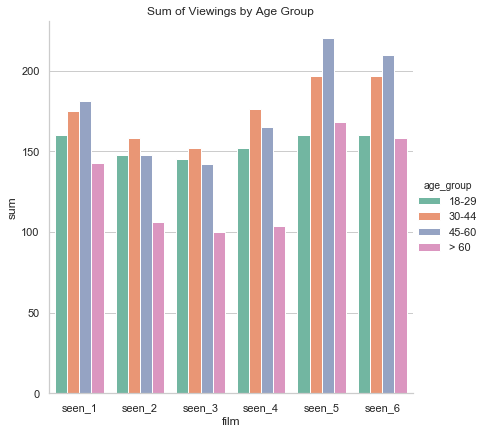

Age group with most viewings = 45-60 with 1066.0 viewings. Age group with least amount of viewings = > 60 group with 779.0 viewings.


In [73]:
sums = {}
for v in star_wars["Age"].unique():
    df = star_wars[star_wars["Age"] == v]
    sum_seen = df[df.columns[3:9]].sum()
    sums[v] = sum_seen
    
sums = pd.DataFrame(sums)
sums_age = pd.DataFrame()
for column_name in sums.columns:
    series = sums[column_name]
    sums_age = pd.concat([sums_age, series])
    
sums_age.columns = ["sum"]
    
sums_age["film"] = sums_age.index.values
sums_age["age_group"] = 0
sums_age.iloc[:6, 2] = "18-29"
sums_age.iloc[6:12, 2] = np.nan
sums_age.iloc[12:18, 2] = "30-44"
sums_age.iloc[24:, 2] = "45-60"
sums_age.iloc[18:24, 2] = "> 60"

sums_age = sums_age.dropna()
sums_age.index = range(24)

# Plot
g = sns.catplot(x="film", y="sum", hue="age_group", data=sums_age,
                height=6, kind="bar", hue_order=("18-29", "30-44", "45-60", "> 60"), palette="Set2")
plt.title('Sum of Viewings by Age Group')
plt.show()

# Calc total viewings for each age group
sum_totals = {}
for v in sums_age["age_group"].unique():
    total_viewings = sums_age[sums_age["age_group"] == v]["sum"].sum()
    sum_totals[v] = total_viewings
    
max_age = max(sum_totals, key=sum_totals.get)
min_age = min(sum_totals, key=sum_totals.get)

print("Age group with most viewings = {} with {} viewings. Age group with least amount of viewings = {} group with {} viewings."
      .format(max_age, sum_totals[max_age], min_age, sum_totals[min_age]))


The franchise appears to be most popular among the 45-60 and 30-44 age groups respectively, which reported the most amount of viewings. This is not surprising given the release dates of the original films in the late 70s to early 80s. 

All age groups agree the best film is "Star Wars: Episode V The Empire Strikes Back". Most age groups agreed "Star Wars: Episode III – Revenge of the Sith" was the worst film, with the exception of the 18-29 age group which disliked "Star Wars: Episode I – The Phantom Menace" the most. 

Interestingly, "Star Wars: Episode I – The Phantom Menace", which was released in 1999, is more popular among the older age groups (45-60 and > 60) compared to the younger age groups (18-29 and 30-44). Conversely, the original film "Star Wars: Episode IV – A New Hope", which was released in 1977, is more popular among the younger age groups than the older age groups. 